In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#### Import necessary libraries and read data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Importing dataset 
bike = pd.read_csv('day.csv')

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#inspect various aspects of the dataset
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the above, we can also see that all columns have complete non-null values, which indicates that there were no missing values

In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#checking for duplicate values in the dataset
bike_2 = bike.copy()

In [9]:
bike_2.drop_duplicates(inplace=True)

In [10]:
bike_2.shape

(730, 16)

The duplicate dataset created has the same number of rowns and columns after dropping duplicates. This indicates there were no duplicates found in the dataset

In [11]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###### Converting 'Season', 'weathersit', 'month' and 'weekday' columns to categorical variables and back to binary numerical columns, since these columns are given in numeric values which may indicate that there is some order to them

In [12]:
#converting seasons to categorical
def season_map(x):
    return x.map({1: "spring", 2: "summer", 3: "fall", 4:"winter"})

bike[['season']] = bike[['season']].apply(season_map)

In [13]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
#converting weathersit to categorical
def weathersit_map(x):
    return x.map({1: "cloudy", 2: "mist", 3: "light rain", 4:"heavy rain"})

bike[['weathersit']] = bike[['weathersit']].apply(weathersit_map)


In [15]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,spring,0,1,0,3,1,cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,spring,0,1,0,4,1,cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,spring,0,1,0,5,1,cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
#converting mnth to categorical
bike[['mnth']] = bike[['mnth']].replace({1: "jan", 2: "feb", 3: "mar", 4:"apr", 5:"may", 6: "jun", 7:"jul", 8: "aug", 9: "sep", 10: "oct", 11: "nov", 12: "dec"})

In [17]:
#converting weekday to categorical
bike[['weekday']] = bike[['weekday']].replace({1: "mon", 2: "tue", 3: "wed", 4:"thur", 5:"fri", 6: "sat", 0:"sun"})

In [18]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,spring,0,jan,0,wed,1,cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,spring,0,jan,0,thur,1,cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,spring,0,jan,0,fri,1,cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
bike.drop(["instant", "dteday", "casual", "registered", "holiday"], axis = 1, inplace = True)

In [20]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,wed,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,thur,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,fri,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing the dataset

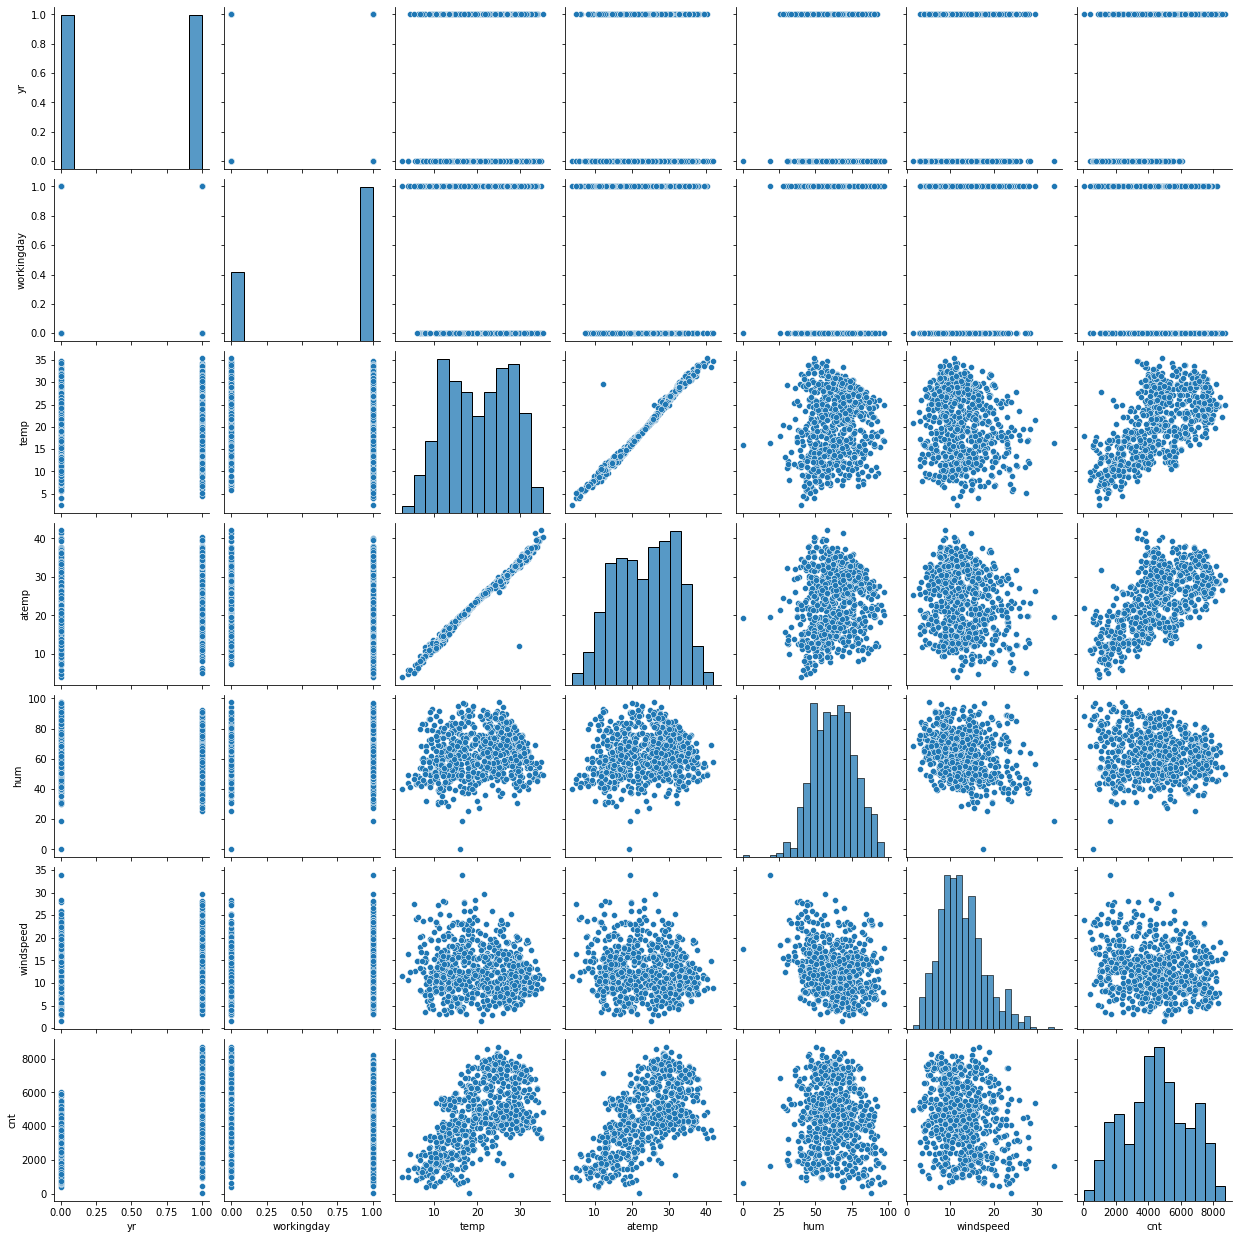

In [21]:
#we visualize the numerical values in a dataset
sns.pairplot(bike)
plt.show()

Inferences:

1. 'atemp' and 'temp' columns have a high linear relation
2. 'atemp' and 'temp' show some pattern of linear relation with 'cnt'

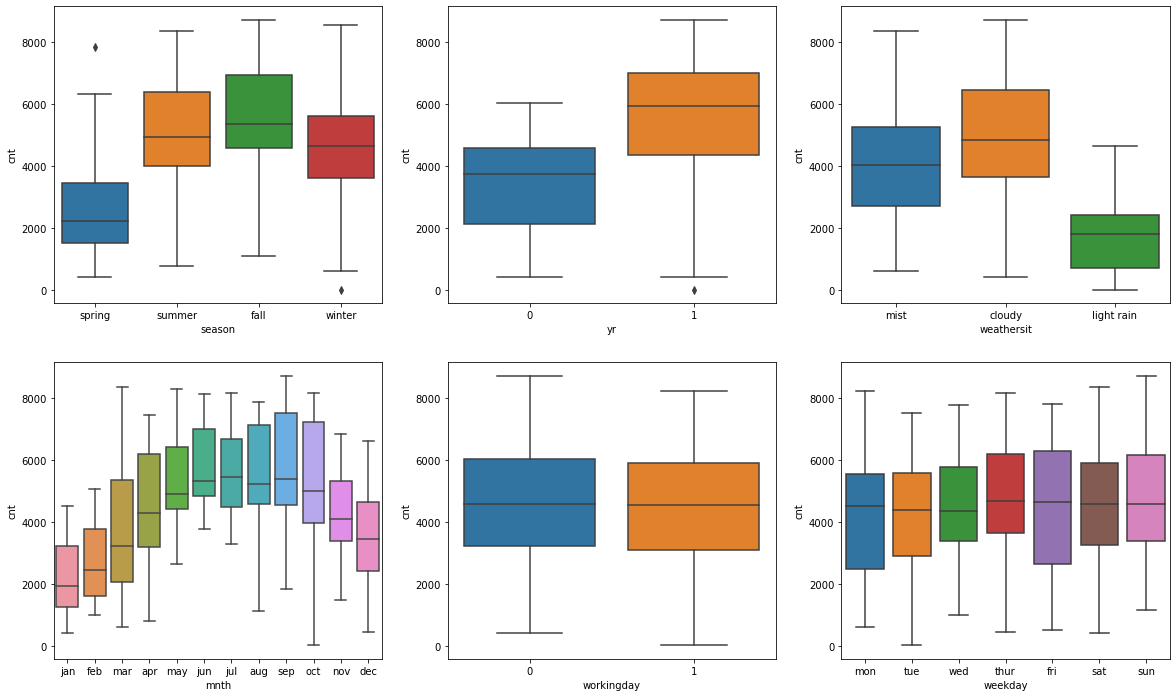

In [22]:
#visualizing categorical variables in boxplot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()

Inferences:

1. The number of bikes 'cnt' have increased with increase in year, that is bike usage is more in 2019
2. We note that the demand for bikes go down with change in weather to light rain
3. The number of bikes demanded 'cnt', remain almost the same for both working day and non-working day

In [23]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,wed,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,thur,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,fri,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
#creating dummies for categorical variables
dummies = pd.get_dummies(bike[["season","weathersit", 'mnth', 'weekday']], drop_first=True)

In [25]:
bike = pd.concat([bike, dummies], axis = 1)

In [26]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed
0,spring,0,jan,mon,1,mist,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,jan,tue,1,mist,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,jan,wed,1,cloudy,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,thur,1,cloudy,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,fri,1,cloudy,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [27]:
bike.drop(["season","weathersit", "mnth", "weekday"], axis = 1, inplace = True)

In [28]:
bike.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed
0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   workingday             730 non-null    int64  
 2   temp                   730 non-null    float64
 3   atemp                  730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_spring          730 non-null    uint8  
 8   season_summer          730 non-null    uint8  
 9   season_winter          730 non-null    uint8  
 10  weathersit_light rain  730 non-null    uint8  
 11  weathersit_mist        730 non-null    uint8  
 12  mnth_aug               730 non-null    uint8  
 13  mnth_dec               730 non-null    uint8  
 14  mnth_feb               730 non-null    uint8  
 15  mnth_j

##### Splitting the dataset to train and test data before rescaling

In [30]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Rescaling the variables

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed
653,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
df_train.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


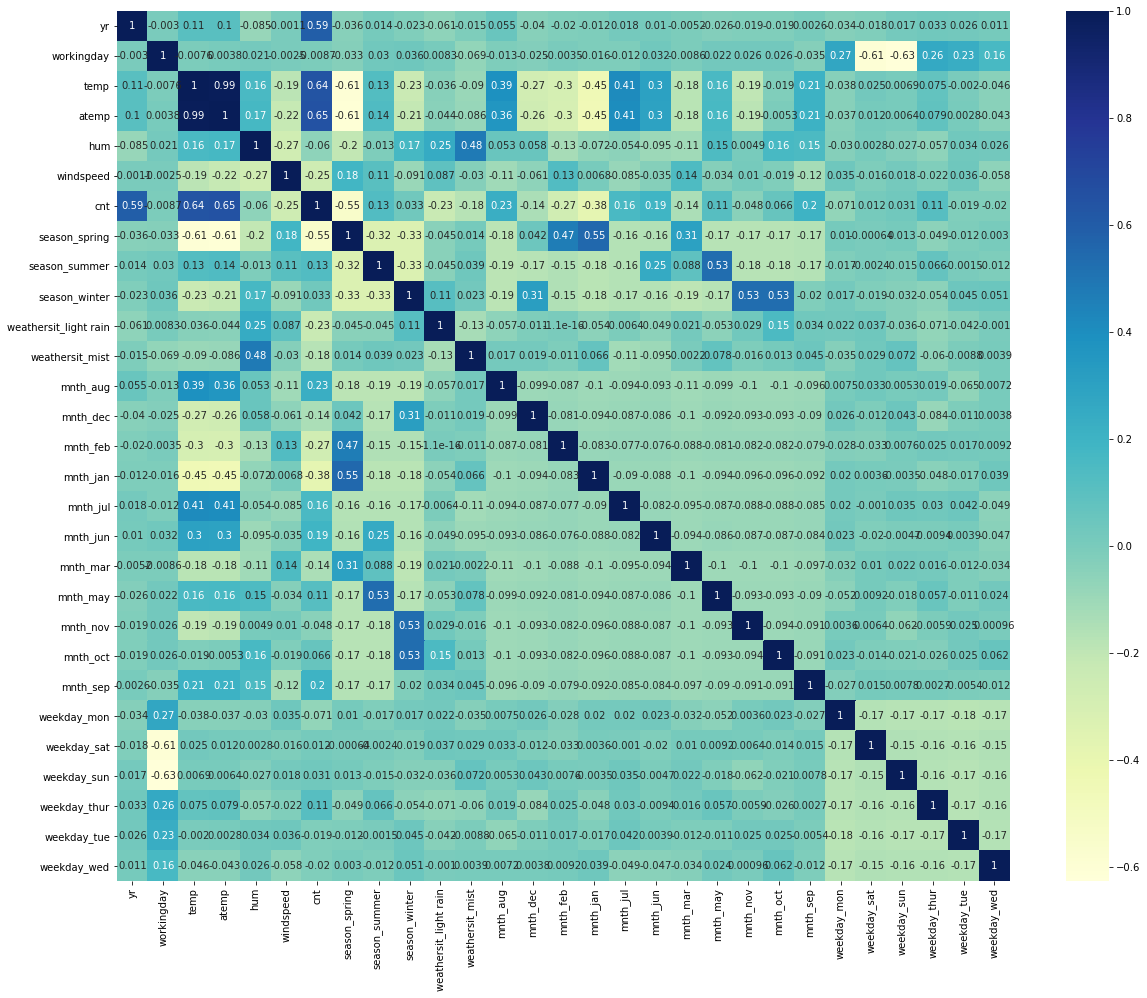

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [37]:
#Defining x and y in the data
y_train = df_train.pop('cnt')
X_train = df_train

##### Choosing feature variables using RFE

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 12 
#we have chosen 12 variables, so that we don't overfit the model by large number of variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)            
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', False, 2),
 ('weathersit_light rain', True, 1),
 ('weathersit_mist', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 6),
 ('mnth_feb', False, 7),
 ('mnth_jan', False, 4),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 9),
 ('mnth_nov', False, 5),
 ('mnth_oct', False, 14),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thur', False, 15),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'weathersit_light rain', 'weathersit_mist', 'mnth_jul', 'mnth_sep',
       'weekday_sat', 'weekday_sun'],
      dtype='object')

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

###### Model 1

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [45]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.29e-183
Time:                        05:28:17   Log-Likelihood:                 493.15
No. Observations:                 510   AIC:                            -960.3
Df Residuals:                     497   BIC:                            -905.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [46]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.17
1,workingday,18.26
2,temp,12.96
4,windspeed,4.61
11,weekday_sun,4.27
10,weekday_sat,4.09
7,weathersit_mist,2.21
0,yr,2.06
5,season_spring,1.96
8,mnth_jul,1.40


In [48]:
#Removing the variable 'hum' based on its Very High 'VIF' value
X_train_new = X_train_rfe.drop(['hum'], axis=1)

In [49]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'weathersit_light rain', 'weathersit_mist', 'mnth_jul', 'mnth_sep',
       'weekday_sat', 'weekday_sun'],
      dtype='object')

###### Model 2

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.00e-182
Time:                        05:28:17   Log-Likelihood:                 488.24
No. Observations:                 510   AIC:                            -952.5
Df Residuals:                     498   BIC:                            -901.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [51]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.89
1,workingday,10.80
3,windspeed,4.55
10,weekday_sun,3.00
9,weekday_sat,2.88
0,yr,2.05
4,season_spring,1.90
6,weathersit_mist,1.58
7,mnth_jul,1.36
8,mnth_sep,1.20


In [53]:
#Removing the variable 'workingday' based on its Very High 'VIF' value and slightly high p-value
X_train_lm1 = X_train_lm.drop(['workingday'], axis=1)

###### Model 3

In [54]:
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_lm1)
lm = sm.OLS(y_train,X_train_lm1).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.14e-182
Time:                        05:28:17   Log-Likelihood:                 483.95
No. Observations:                 510   AIC:                            -945.9
Df Residuals:                     499   BIC:                            -899.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [55]:
X_train_lm2 = X_train_lm1.drop(['const'], axis=1)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.74
2,windspeed,3.82
0,yr,2.03
3,season_spring,1.53
5,weathersit_mist,1.50
6,mnth_jul,1.33
7,mnth_sep,1.20
9,weekday_sun,1.19
8,weekday_sat,1.18
4,weathersit_light rain,1.06


In [57]:
#dropping 'weekday_sat' due to high p-value
X_train_lm2 = X_train_lm2.drop(['weekday_sat'], axis=1)

###### Model 4

In [58]:
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_lm2)
lm = sm.OLS(y_train,X_train_lm3).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          6.86e-183
Time:                        05:28:18   Log-Likelihood:                 482.90
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     500   BIC:                            -903.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [59]:
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.63
2,windspeed,3.82
0,yr,2.03
3,season_spring,1.52
5,weathersit_mist,1.49
6,mnth_jul,1.33
7,mnth_sep,1.20
8,weekday_sun,1.17
4,weathersit_light rain,1.06


In [61]:
#dropping 'weekday_sun' due to significantly high p-value
X_train_lm3 = X_train_lm3.drop(['weekday_sun'], axis=1)

###### Model 5

In [62]:
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_lm3)
lm = sm.OLS(y_train,X_train_lm4).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.84e-183
Time:                        05:28:18   Log-Likelihood:                 481.31
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     501   BIC:                            -906.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [63]:
X_train_lm5 = X_train_lm4.drop(['const'], axis=1)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.60
2,windspeed,3.81
0,yr,2.03
3,season_spring,1.52
5,weathersit_mist,1.48
6,mnth_jul,1.33
7,mnth_sep,1.20
4,weathersit_light rain,1.06


In [65]:
X_train_lm5 = X_train_lm5.drop(['mnth_sep'], axis=1)

###### Model 6

In [66]:
import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_lm5)
lm = sm.OLS(y_train,X_train_lm5).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     326.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.91e-182
Time:                        05:29:37   Log-Likelihood:                 475.93
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     502   BIC:                            -902.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [67]:
X_train_lm5 = X_train_lm5.drop(['const'], axis=1)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.19
2,windspeed,3.76
0,yr,2.03
3,season_spring,1.51
5,weathersit_mist,1.48
6,mnth_jul,1.28
4,weathersit_light rain,1.06


In [71]:
import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_lm5)
lm = sm.OLS(y_train,X_train_lm6).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     326.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.91e-182
Time:                        05:33:37   Log-Likelihood:                 475.93
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     502   BIC:                            -902.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

##### Our final and the best fit model

The equation of best fitted surface based on model lm:
**cnt = 0.3018 + (yr × 0.2350) + (temp ×  0.4111) − (windspeed × 0.1600) - (season_spring × 0.1467 ) - (weathersit_light rain × 0.2702) - (weathersit_mist  × 0.0789 ) - (mnth_jul  × 0.0836)**

### Residual Analysis

In [72]:
y_train_pred = lm.predict(X_train_lm6)

In [74]:
res = y_train-y_train_pred

Text(0.5, 0, 'Errors')

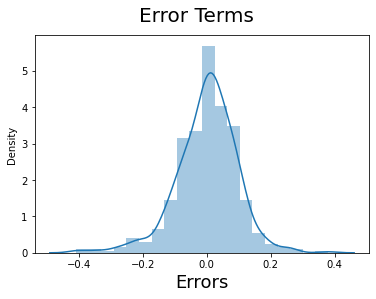

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18) 

In [97]:
#checking for patterns in residuals 
res.shape

(510,)

Inference:
The error terms seem to normally distributed and are centered around 0, which is inline with our expectations.

### Making Predictions using the final model

In [76]:
#rescaling the test dataset first
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [77]:
df_test.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed
184,0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,1,0,0,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [78]:
df_test.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
#defining x and y for test dataset
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    int64  
 1   workingday             219 non-null    int64  
 2   temp                   219 non-null    float64
 3   atemp                  219 non-null    float64
 4   hum                    219 non-null    float64
 5   windspeed              219 non-null    float64
 6   season_spring          219 non-null    uint8  
 7   season_summer          219 non-null    uint8  
 8   season_winter          219 non-null    uint8  
 9   weathersit_light rain  219 non-null    uint8  
 10  weathersit_mist        219 non-null    uint8  
 11  mnth_aug               219 non-null    uint8  
 12  mnth_dec               219 non-null    uint8  
 13  mnth_feb               219 non-null    uint8  
 14  mnth_jan               219 non-null    uint8  
 15  mnth_

In [82]:
col1=X_train_lm5.columns
X_test=X_test[col1]

In [83]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   temp                   219 non-null    float64
 3   windspeed              219 non-null    float64
 4   season_spring          219 non-null    uint8  
 5   weathersit_light rain  219 non-null    uint8  
 6   weathersit_mist        219 non-null    uint8  
 7   mnth_jul               219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [84]:
# Making predictions using the final model (lm6)

y_pred = lm.predict(X_test_lm6)

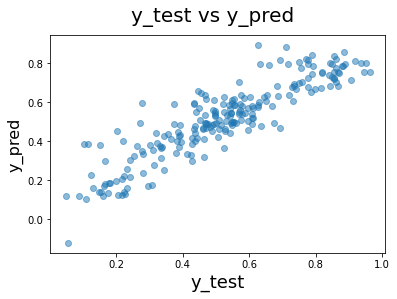

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [86]:
#calculating r2 score for the test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7986429196227415

In [92]:
r2 = 0.7986429196227415

In [90]:
#calculating adjusted r2 score for test data
X_test.shape

(219, 7)

In [91]:
n = X_test.shape[0]
p = X_test.shape[1]

In [93]:
#finding adjusted r2 using formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7919628269088039

Inference:

The training r2 score is 0.820 and the test r2 score is 0.798, which has a difference below 0.05, hence is acceptable
The adjusted r2 for training is 0.818 and the test data is 0.791 which also has a similar difference, which makes our model seem fit

###### Business Inference from our best fit model

The equation of best fitted surface based on model lm:
cnt = 0.3018 + (yr × 0.2350) + (temp ×  0.4111) − (windspeed × 0.1600) - (season_spring × 0.1467 ) - (weathersit_light rain × 0.2702) - (weathersit_mist  × 0.0789 ) - (mnth_jul  × 0.0836)